#### The dataset is available at <a href="">

In [19]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
from tqdm import tqdm_notebook, tqdm_pandas, tqdm
import sys
import string

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.cross_validation import train_test_split

In [4]:
sns.set_style()

In [5]:
pd.set_option('display.max_colwidth', 0)

In [6]:
data = pd.read_csv('../datasets/question-pairs-dataset/questions.csv')

In [7]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0


In [8]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       2
is_duplicate    0
dtype: int64

In [9]:
data.dropna(inplace=True)

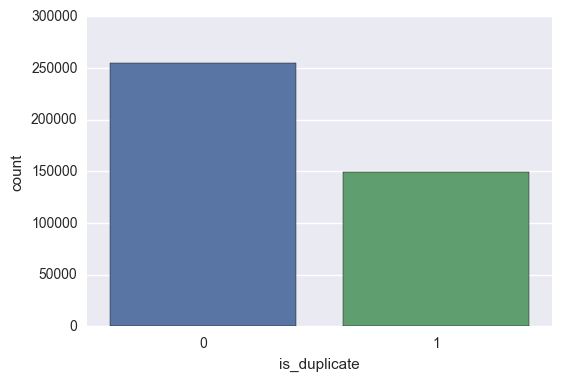

In [10]:
_ = sns.barplot([0, 1], [data[data.is_duplicate == 0].shape[0], data[data.is_duplicate == 1].shape[0]])
plt.xlabel('is_duplicate')
plt.ylabel('count')

### Lets start cleaning the questions (tokenization, removing stopwords e.t.c) ###

In [11]:
sw = stopwords.words()

In [12]:
def create_clean_lists(sentence):
    return [x for x in word_tokenize(sentence) if x not in sw]

In [13]:
sys.stdout.flush()
tqdm.pandas(desc="question1")
data['question1_cleaned'] = data.question1.progress_apply(lambda x : create_clean_lists(x))

question1: 100%|██████████| 404349/404349 [05:16<00:00, 1276.38it/s]


In [14]:
sys.stdout.flush()
tqdm.pandas(desc="question2")
data['question2_cleaned'] = data.question2.progress_apply(lambda x : create_clean_lists(x))

question2: 100%|██████████| 404349/404349 [05:17<00:00, 1272.49it/s]


In [16]:
sys.stdout.flush()
tqdm.pandas(desc="lower1")
data['question1_cleaned'] = data['question1_cleaned'].apply(lambda x : [i.lower() for i in x])

In [17]:
sys.stdout.flush()
tqdm.pandas(desc="lower2")
data['question2_cleaned'] = data['question2_cleaned'].apply(lambda x : [i.lower() for i in x])

In [18]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, step, step, guide, invest, share, market, india, ?]","[what, step, step, guide, invest, share, market, ?]"
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, story, kohinoor, (, koh-i-noor, ), diamond, ?]","[what, would, happen, indian, government, stole, kohinoor, (, koh-i-noor, ), diamond, back, ?]"
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[how, i, increase, speed, internet, connection, using, vpn, ?]","[how, internet, speed, increased, hacking, dns, ?]"
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[why, i, mentally, lonely, ?, how, i, solve, ?]","[find, remainder, [, math, ], 23^, {, 24, }, [, /math, ], divided, 24,23, ?]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[which, one, dissolve, water, quikly, sugar, ,, salt, ,, methane, carbon, oxide, ?]","[which, fish, would, survive, salt, water, ?]"


In [23]:
def remove_puncts(w):
    return [x for x in w if x not in string.punctuation]

In [24]:
remove_puncts(['what', 'step', 'step', 'guide', 'invest', 'share', 'market', 'india', '?'])

['what', 'step', 'step', 'guide', 'invest', 'share', 'market', 'india']

In [25]:
sys.stdout.flush()
tqdm.pandas(desc="punct1")
data['question1_cleaned'] = data['question1_cleaned'].apply(lambda x : remove_puncts(x))

In [26]:
sys.stdout.flush()
tqdm.pandas(desc="punct2")
data['question2_cleaned'] = data['question2_cleaned'].apply(lambda x : remove_puncts(x))

### columns 'question1_cleaned' and 'question2_cleaned' contains list of cleaned words from the original questions respectively ###

In [28]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate,question1_cleaned,question2_cleaned
0,0,1,2,What is the step by step guide to invest in share market in india?,What is the step by step guide to invest in share market?,0,"[what, step, step, guide, invest, share, market, india]","[what, step, step, guide, invest, share, market]"
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Diamond?,What would happen if the Indian government stole the Kohinoor (Koh-i-Noor) diamond back?,0,"[what, story, kohinoor, koh-i-noor, diamond]","[what, would, happen, indian, government, stole, kohinoor, koh-i-noor, diamond, back]"
2,2,5,6,How can I increase the speed of my internet connection while using a VPN?,How can Internet speed be increased by hacking through DNS?,0,"[how, i, increase, speed, internet, connection, using, vpn]","[how, internet, speed, increased, hacking, dns]"
3,3,7,8,Why am I mentally very lonely? How can I solve it?,"Find the remainder when [math]23^{24}[/math] is divided by 24,23?",0,"[why, i, mentally, lonely, how, i, solve]","[find, remainder, math, 23^, 24, /math, divided, 24,23]"
4,4,9,10,"Which one dissolve in water quikly sugar, salt, methane and carbon di oxide?",Which fish would survive in salt water?,0,"[which, one, dissolve, water, quikly, sugar, salt, methane, carbon, oxide]","[which, fish, would, survive, salt, water]"
